# 🍷 Case Study: Wine Quality Classification

---

## From Grape to Grade: Predicting Wine Quality

Wine quality assessment is traditionally done by expert sommeliers who spend years training their palates. But can we teach a machine to "taste" wine? Can chemical analysis replace human expertise?

> **The Challenge**: Given chemical properties of wine (acidity, alcohol content, sulfur levels, etc.), predict the quality rating on a 3-8 scale.

This is a **multi-class classification** problem — and it's *perfect* for Softmax Regression!

---

### Why This Dataset?

| Aspect | Details |
|--------|---------|
| **Source** | Real data from wine certification in Portugal (Vinho Verde region) |
| **Features** | 11 physicochemical measurements — interpretable and meaningful |
| **Target** | Multi-class (quality scores 3-8, that's 6 classes!) |
| **Challenge** | Heavily imbalanced — most wines are "average" quality |
| **Size** | ~1,600 red wine samples |

### What We'll Learn

1. **Multi-class classification** with Softmax (not just binary!)
2. **Handling class imbalance** in real production data
3. **Feature importance** — which chemicals drive quality?
4. **Model comparison** — scratch implementation vs sklearn

Let's uncork this problem! 🍷

## 1. Data Loading & First Look

Let's load the real UCI Wine Quality dataset. This data was collected during wine certification and contains objective measurements from physicochemical tests.

In [1]:
# ============================================================================
# WINE QUALITY CLASSIFICATION - SOFTMAX REGRESSION CASE STUDY
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set visual style
plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

# Load real UCI Wine Quality dataset (Red Wine)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
print("📥 Downloading Wine Quality dataset from UCI Repository...")
print(f"   URL: {url}\n")

df = pd.read_csv(url, sep=';')

print(f"✅ Successfully loaded {len(df):,} wine samples!")
print(f"\n📋 Features ({len(df.columns)-1} physicochemical properties):")
for i, col in enumerate(df.columns[:-1], 1):
    print(f"   {i:2d}. {col}")
print(f"\n🎯 Target: '{df.columns[-1]}'")
print(f"   Quality scores range from {df['quality'].min()} to {df['quality'].max()}")

📥 Downloading Wine Quality dataset from UCI Repository...
   URL: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

✅ Successfully loaded 1,599 wine samples!

📋 Features (11 physicochemical properties):
    1. fixed acidity
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide
    7. total sulfur dioxide
    8. density
    9. pH
   10. sulphates
   11. alcohol

🎯 Target: 'quality'
   Quality scores range from 3 to 8


In [2]:
# First look at the data
print("🔍 First 10 samples:\n")
df.head(10)

🔍 First 10 samples:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# Basic statistics and data quality check
print("📊 Dataset Statistics:\n")
print(df.describe().round(3))

print("\n" + "="*60)
print("🔎 Data Quality Check:")
print(f"   Missing values: {df.isnull().sum().sum()}")
print(f"   Duplicate rows: {df.duplicated().sum()}")
print(f"   Data types: {df.dtypes.value_counts().to_dict()}")

📊 Dataset Statistics:

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count       1599.000          1599.000     1599.000        1599.000   
mean           8.320             0.528        0.271           2.539   
std            1.741             0.179        0.195           1.410   
min            4.600             0.120        0.000           0.900   
25%            7.100             0.390        0.090           1.900   
50%            7.900             0.520        0.260           2.200   
75%            9.200             0.640        0.420           2.600   
max           15.900             1.580        1.000          15.500   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count   1599.000             1599.000              1599.000  1599.000   
mean       0.087               15.875                46.468     0.997   
std        0.047               10.460                32.895     0.002   
min        0.012                1.000        

## 2. Exploratory Data Analysis (EDA)

### The Class Imbalance Problem

Before we build any model, we need to understand our target variable. In real-world classification problems, **class imbalance** is extremely common — and wine quality is no exception!

Most wines are "average" quality (5-6). Very few wines are exceptionally good (8) or notably bad (3).

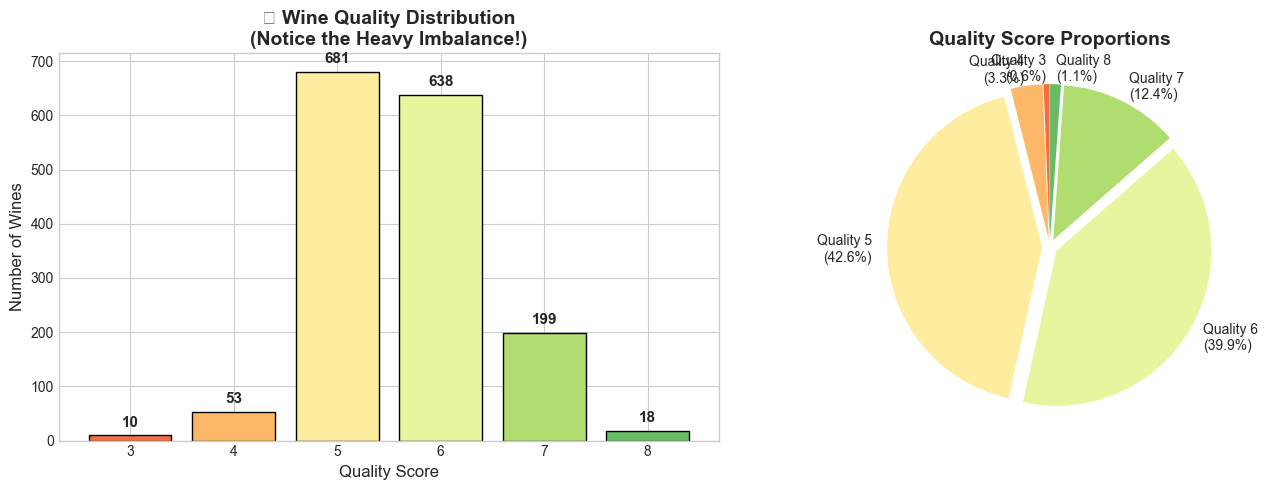


📊 Class Distribution Analysis:
Quality 3:   10 samples (  0.6%) 
Quality 4:   53 samples (  3.3%) ███
Quality 5:  681 samples ( 42.6%) ██████████████████████████████████████████
Quality 6:  638 samples ( 39.9%) ███████████████████████████████████████
Quality 7:  199 samples ( 12.4%) ████████████
Quality 8:   18 samples (  1.1%) █

⚠️  Challenge: Classes 3 and 8 have very few samples!
   Majority class (quality 5): 681 samples
   Minority class (quality 3): 10 samples
   Imbalance ratio: 68.1:1


In [4]:
# ============================================================================
# QUALITY DISTRIBUTION - THE IMBALANCE PROBLEM
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of quality distribution
quality_counts = df['quality'].value_counts().sort_index()
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(quality_counts)))

ax1 = axes[0]
bars = ax1.bar(quality_counts.index.astype(str), quality_counts.values, color=colors, edgecolor='black')
ax1.set_xlabel('Quality Score', fontsize=12)
ax1.set_ylabel('Number of Wines', fontsize=12)
ax1.set_title('🍷 Wine Quality Distribution\n(Notice the Heavy Imbalance!)', fontsize=14, fontweight='bold')

# Add count labels on bars
for bar, count in zip(bars, quality_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{count}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Percentage pie chart
ax2 = axes[1]
ax2.pie(quality_counts.values, labels=[f'Quality {q}\n({c/len(df)*100:.1f}%)' 
                                         for q, c in zip(quality_counts.index, quality_counts.values)],
        colors=colors, autopct='', startangle=90, explode=[0.05]*len(quality_counts))
ax2.set_title('Quality Score Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print the imbalance statistics
print("\n📊 Class Distribution Analysis:")
print("="*50)
for quality, count in quality_counts.items():
    pct = count / len(df) * 100
    bar = "█" * int(pct)
    print(f"Quality {quality}: {count:4d} samples ({pct:5.1f}%) {bar}")

print("\n⚠️  Challenge: Classes 3 and 8 have very few samples!")
print(f"   Majority class (quality 5): {quality_counts[5]} samples")
print(f"   Minority class (quality 3): {quality_counts[3]} samples")
print(f"   Imbalance ratio: {quality_counts[5]/quality_counts[3]:.1f}:1")

In [5]:
# ============================================================================
# FEATURE CORRELATION ANALYSIS
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full correlation heatmap
ax1 = axes[0]
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, ax=ax1,
            annot_kws={'size': 8})
ax1.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

# Correlation with quality (target variable)
ax2 = axes[1]
quality_corr = df.corr()['quality'].drop('quality').sort_values()
colors = ['#d73027' if x < 0 else '#1a9850' for x in quality_corr.values]
bars = ax2.barh(quality_corr.index, quality_corr.values, color=colors, edgecolor='black')
ax2.axvline(x=0, color='black', linewidth=0.8)
ax2.set_xlabel('Correlation with Quality', fontsize=12)
ax2.set_title('🎯 Which Features Predict Quality?', fontsize=14, fontweight='bold')
ax2.set_xlim(-0.7, 0.7)

# Add correlation values
for bar, val in zip(bars, quality_corr.values):
    x_pos = val + 0.02 if val >= 0 else val - 0.02
    ha = 'left' if val >= 0 else 'right'
    ax2.text(x_pos, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', ha=ha, fontsize=9)

plt.tight_layout()
plt.show()

print("\n🔍 Key Insights from Correlations:")
print("="*50)
print("✅ POSITIVE correlation with quality:")
print("   • Alcohol (+0.48) — Higher alcohol = better wine!")
print("   • Sulphates (+0.25) — Antimicrobial properties")
print("   • Citric acid (+0.23) — Adds freshness")
print("\n❌ NEGATIVE correlation with quality:")
print("   • Volatile acidity (-0.39) — Too much = vinegar taste")
print("   • Total sulfur dioxide (-0.19) — Excess = sulfur smell")
print("   • Density (-0.17) — Higher density = less alcohol")


🔍 Key Insights from Correlations:
✅ POSITIVE correlation with quality:
   • Alcohol (+0.48) — Higher alcohol = better wine!
   • Sulphates (+0.25) — Antimicrobial properties
   • Citric acid (+0.23) — Adds freshness

❌ NEGATIVE correlation with quality:
   • Volatile acidity (-0.39) — Too much = vinegar taste
   • Total sulfur dioxide (-0.19) — Excess = sulfur smell
   • Density (-0.17) — Higher density = less alcohol


In [6]:
# ============================================================================
# FEATURE DISTRIBUTIONS BY QUALITY
# ============================================================================

# Select the 4 most important features based on correlation
key_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    ax = axes[idx]
    
    # Box plot by quality
    df.boxplot(column=feature, by='quality', ax=ax, 
               patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='black'),
               medianprops=dict(color='red', linewidth=2))
    
    ax.set_xlabel('Quality Score', fontsize=11)
    ax.set_ylabel(feature.title(), fontsize=11)
    ax.set_title(f'{feature.title()} by Wine Quality', fontsize=12, fontweight='bold')
    ax.get_figure().suptitle('')  # Remove automatic title

plt.suptitle('🔬 Key Features vs Wine Quality', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n🍷 Wine Chemistry Insights:")
print("="*50)
print("• ALCOHOL: Higher quality wines have higher alcohol content")
print("  Quality 3: ~10% | Quality 8: ~12%")
print("• VOLATILE ACIDITY: Lower is better (less vinegar-like)")
print("  Quality 3: ~0.8 g/L | Quality 8: ~0.4 g/L")
print("• SULPHATES: Moderate levels associated with quality")
print("• CITRIC ACID: Higher quality wines tend to have more")


🍷 Wine Chemistry Insights:
• ALCOHOL: Higher quality wines have higher alcohol content
  Quality 3: ~10% | Quality 8: ~12%
• VOLATILE ACIDITY: Lower is better (less vinegar-like)
  Quality 3: ~0.8 g/L | Quality 8: ~0.4 g/L
• SULPHATES: Moderate levels associated with quality
• CITRIC ACID: Higher quality wines tend to have more


## 3. Data Preprocessing

### Preparing for Multi-Class Classification

Before we train our Softmax model, we need to:
1. **Separate features and target**
2. **Standardize features** (gradient descent converges faster)
3. **Split into training and test sets** (stratified to preserve class distribution)

We'll keep all 6 quality classes (3-8) to demonstrate true multi-class Softmax Regression. This is harder than binary classification, but more realistic!

In [7]:
# ============================================================================
# DATA PREPROCESSING PIPELINE
# ============================================================================

# 1. Separate features and target
X = df.drop('quality', axis=1).values
y = df['quality'].values
feature_names = df.columns[:-1].tolist()

print("📊 Dataset Shape:")
print(f"   Features (X): {X.shape}")
print(f"   Target (y): {y.shape}")
print(f"   Classes: {np.unique(y)}")

# 2. Encode target to 0-indexed classes for Softmax
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
n_classes = len(label_encoder.classes_)

print(f"\n🔢 Label Encoding:")
for orig, enc in zip(label_encoder.classes_, range(n_classes)):
    print(f"   Quality {orig} → Class {enc}")

# 3. Train/Test Split (stratified to preserve class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded  # Important for imbalanced data!
)

print(f"\n📂 Train/Test Split (80/20):")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")

# 4. Standardize features (critical for gradient descent!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n⚖️  Feature Standardization:")
print(f"   Mean (train): {X_train_scaled.mean(axis=0).round(6)[:3]}... (should be ~0)")
print(f"   Std (train): {X_train_scaled.std(axis=0).round(3)[:3]}... (should be ~1)")

# Verify class distribution is preserved
print(f"\n📊 Class Distribution After Split:")
train_dist = pd.Series(y_train).value_counts().sort_index()
test_dist = pd.Series(y_test).value_counts().sort_index()
print("   Class | Train | Test  | Train% | Test%")
print("   " + "-"*45)
for cls in range(n_classes):
    tr_count = train_dist.get(cls, 0)
    te_count = test_dist.get(cls, 0)
    tr_pct = tr_count / len(y_train) * 100
    te_pct = te_count / len(y_test) * 100
    print(f"     {cls}   |  {tr_count:4d} |  {te_count:3d}  | {tr_pct:5.1f}% | {te_pct:5.1f}%")

📊 Dataset Shape:
   Features (X): (1599, 11)
   Target (y): (1599,)
   Classes: [3 4 5 6 7 8]

🔢 Label Encoding:
   Quality 3 → Class 0
   Quality 4 → Class 1
   Quality 5 → Class 2
   Quality 6 → Class 3
   Quality 7 → Class 4
   Quality 8 → Class 5

📂 Train/Test Split (80/20):
   Training samples: 1279
   Test samples: 320

⚖️  Feature Standardization:
   Mean (train): [0. 0. 0.]... (should be ~0)
   Std (train): [1. 1. 1.]... (should be ~1)

📊 Class Distribution After Split:
   Class | Train | Test  | Train% | Test%
   ---------------------------------------------
     0   |     8 |    2  |   0.6% |   0.6%
     1   |    42 |   11  |   3.3% |   3.4%
     2   |   545 |  136  |  42.6% |  42.5%
     3   |   510 |  128  |  39.9% |  40.0%
     4   |   159 |   40  |  12.4% |  12.5%
     5   |    15 |    3  |   1.2% |   0.9%


## 4. Softmax Regression from Scratch

Now for the main event! Let's implement **Softmax Regression** from scratch.

### The Math Behind Softmax

For K classes, Softmax converts raw scores (logits) into probabilities:

$$P(y = k | x) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}$$

where $z_k = w_k^T x + b_k$ is the logit for class $k$.

**Key Properties:**
- All probabilities sum to 1 (valid probability distribution)
- Numerically stable version: subtract max(z) before exponentiating
- Loss function: **Cross-Entropy** $L = -\sum_{k=1}^{K} y_k \log(\hat{p}_k)$

### Gradient Descent Update

The beauty of Softmax + Cross-Entropy is that the gradient is elegantly simple:

$$\frac{\partial L}{\partial W_k} = (p_k - y_k) \cdot x$$

where $p_k$ is the predicted probability and $y_k$ is the one-hot encoded target.

In [8]:
# ============================================================================
# SOFTMAX REGRESSION FROM SCRATCH
# ============================================================================

class SoftmaxRegression:
    """
    Multi-class classification using Softmax Regression.
    
    This is the generalization of Logistic Regression to K classes.
    Instead of sigmoid, we use the softmax function to get probabilities.
    
    Parameters:
    -----------
    learning_rate : float, default=0.1
        Step size for gradient descent
    n_epochs : int, default=1000
        Number of training iterations
    lambda_reg : float, default=0.01
        L2 regularization strength (prevents overfitting)
    verbose : bool, default=True
        Print training progress
    """
    
    def __init__(self, learning_rate=0.1, n_epochs=1000, lambda_reg=0.01, verbose=True):
        self.lr = learning_rate
        self.epochs = n_epochs
        self.lambda_reg = lambda_reg
        self.verbose = verbose
        
    def softmax(self, z):
        """
        Numerically stable softmax function.
        
        We subtract max(z) before exponentiating to prevent overflow.
        This doesn't change the result because:
        exp(z - max) / sum(exp(z - max)) = exp(z) / sum(exp(z))
        """
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def one_hot_encode(self, y, n_classes):
        """Convert class labels to one-hot encoding."""
        m = len(y)
        one_hot = np.zeros((m, n_classes))
        one_hot[np.arange(m), y] = 1
        return one_hot
    
    def compute_loss(self, y_onehot, probs):
        """
        Cross-entropy loss with L2 regularization.
        
        L = -1/m * sum(y * log(p)) + lambda/(2m) * ||W||^2
        """
        m = y_onehot.shape[0]
        # Add small epsilon to avoid log(0)
        cross_entropy = -np.mean(np.sum(y_onehot * np.log(probs + 1e-15), axis=1))
        # L2 regularization term
        reg_term = (self.lambda_reg / (2 * m)) * np.sum(self.W ** 2)
        return cross_entropy + reg_term
    
    def fit(self, X, y):
        """
        Train the Softmax Regression model using Gradient Descent.
        
        Parameters:
        -----------
        X : array-like, shape (m, n)
            Training features
        y : array-like, shape (m,)
            Training labels (integers 0 to K-1)
        """
        m, n = X.shape
        self.n_classes = len(np.unique(y))
        
        # One-hot encode the target
        y_onehot = self.one_hot_encode(y, self.n_classes)
        
        # Initialize weights and biases
        # Xavier initialization for better convergence
        self.W = np.random.randn(n, self.n_classes) * np.sqrt(2.0 / n)
        self.b = np.zeros((1, self.n_classes))
        
        # Track training history
        self.loss_history = []
        self.accuracy_history = []
        
        # Gradient Descent
        for epoch in range(self.epochs):
            # Forward pass: compute logits and probabilities
            z = X @ self.W + self.b           # Shape: (m, K)
            probs = self.softmax(z)            # Shape: (m, K)
            
            # Compute loss
            loss = self.compute_loss(y_onehot, probs)
            self.loss_history.append(loss)
            
            # Compute accuracy
            predictions = np.argmax(probs, axis=1)
            accuracy = np.mean(predictions == y)
            self.accuracy_history.append(accuracy)
            
            # Backward pass: compute gradients
            # The beauty of softmax + cross-entropy: gradient is (p - y)!
            error = probs - y_onehot          # Shape: (m, K)
            
            dW = (1/m) * (X.T @ error) + (self.lambda_reg/m) * self.W
            db = (1/m) * np.sum(error, axis=0, keepdims=True)
            
            # Update parameters
            self.W -= self.lr * dW
            self.b -= self.lr * db
            
            # Print progress
            if self.verbose and (epoch % 200 == 0 or epoch == self.epochs - 1):
                print(f"Epoch {epoch:4d}/{self.epochs} | Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")
        
        return self
    
    def predict_proba(self, X):
        """Return probability distribution over classes."""
        z = X @ self.W + self.b
        return self.softmax(z)
    
    def predict(self, X):
        """Return class with highest probability."""
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)
    
    def score(self, X, y):
        """Return accuracy on given data."""
        predictions = self.predict(X)
        return np.mean(predictions == y)

print("✅ SoftmaxRegression class defined!")
print("\nKey methods:")
print("  • fit(X, y)         - Train the model")
print("  • predict(X)        - Get class predictions")
print("  • predict_proba(X)  - Get probability distribution")
print("  • score(X, y)       - Get accuracy")

✅ SoftmaxRegression class defined!

Key methods:
  • fit(X, y)         - Train the model
  • predict(X)        - Get class predictions
  • predict_proba(X)  - Get probability distribution
  • score(X, y)       - Get accuracy


## 5. Training the Model

Let's train our scratch implementation on the wine quality data!

In [9]:
# ============================================================================
# TRAINING OUR SOFTMAX MODEL
# ============================================================================

print("🚀 Training Softmax Regression from Scratch...")
print("="*60)
print(f"Configuration:")
print(f"  • Learning rate: 0.1")
print(f"  • Epochs: 1000")
print(f"  • L2 Regularization: 0.01")
print(f"  • Classes: {n_classes}")
print("="*60 + "\n")

# Initialize and train
softmax_scratch = SoftmaxRegression(
    learning_rate=0.1,
    n_epochs=1000,
    lambda_reg=0.01,
    verbose=True
)

softmax_scratch.fit(X_train_scaled, y_train)

# Evaluate
train_accuracy = softmax_scratch.score(X_train_scaled, y_train)
test_accuracy = softmax_scratch.score(X_test_scaled, y_test)

print("\n" + "="*60)
print("📊 Final Results:")
print(f"   Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"   Test Accuracy:     {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("="*60)

🚀 Training Softmax Regression from Scratch...
Configuration:
  • Learning rate: 0.1
  • Epochs: 1000
  • L2 Regularization: 0.01
  • Classes: 6

Epoch    0/1000 | Loss: 2.2108 | Accuracy: 0.1853
Epoch  200/1000 | Loss: 0.9840 | Accuracy: 0.6052
Epoch  400/1000 | Loss: 0.9537 | Accuracy: 0.6083
Epoch  600/1000 | Loss: 0.9429 | Accuracy: 0.6153
Epoch  800/1000 | Loss: 0.9368 | Accuracy: 0.6145
Epoch  999/1000 | Loss: 0.9327 | Accuracy: 0.6122

📊 Final Results:
   Training Accuracy: 0.6122 (61.22%)
   Test Accuracy:     0.5906 (59.06%)


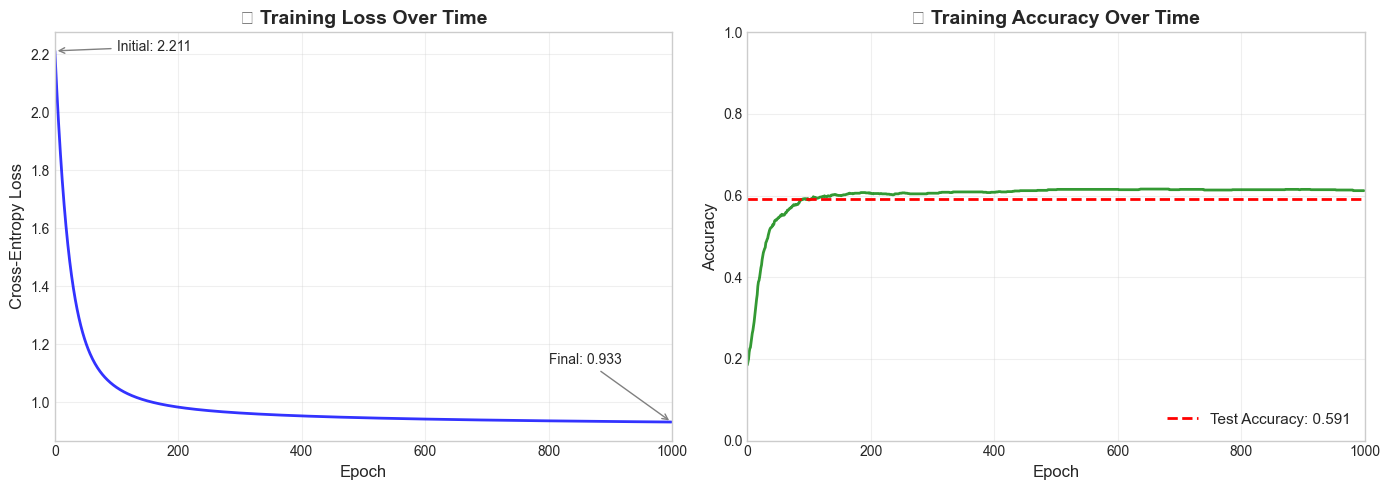


✅ Model converged nicely!
   Loss decreased from 2.211 to 0.933
   Accuracy improved from 0.185 to 0.612


In [10]:
# ============================================================================
# TRAINING CURVES VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
ax1 = axes[0]
ax1.plot(softmax_scratch.loss_history, 'b-', linewidth=2, alpha=0.8)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Cross-Entropy Loss', fontsize=12)
ax1.set_title('📉 Training Loss Over Time', fontsize=14, fontweight='bold')
ax1.set_xlim(0, len(softmax_scratch.loss_history))
ax1.grid(True, alpha=0.3)

# Add annotations
initial_loss = softmax_scratch.loss_history[0]
final_loss = softmax_scratch.loss_history[-1]
ax1.annotate(f'Initial: {initial_loss:.3f}', xy=(0, initial_loss), 
             xytext=(100, initial_loss), fontsize=10,
             arrowprops=dict(arrowstyle='->', color='gray'))
ax1.annotate(f'Final: {final_loss:.3f}', xy=(len(softmax_scratch.loss_history)-1, final_loss),
             xytext=(len(softmax_scratch.loss_history)-200, final_loss + 0.2), fontsize=10,
             arrowprops=dict(arrowstyle='->', color='gray'))

# Accuracy curve
ax2 = axes[1]
ax2.plot(softmax_scratch.accuracy_history, 'g-', linewidth=2, alpha=0.8)
ax2.axhline(y=test_accuracy, color='r', linestyle='--', linewidth=2, label=f'Test Accuracy: {test_accuracy:.3f}')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('📈 Training Accuracy Over Time', fontsize=14, fontweight='bold')
ax2.set_xlim(0, len(softmax_scratch.accuracy_history))
ax2.set_ylim(0, 1)
ax2.legend(loc='lower right', fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Model converged nicely!")
print(f"   Loss decreased from {initial_loss:.3f} to {final_loss:.3f}")
print(f"   Accuracy improved from {softmax_scratch.accuracy_history[0]:.3f} to {softmax_scratch.accuracy_history[-1]:.3f}")

## 6. Model Evaluation: Confusion Matrix & Classification Report

Accuracy alone doesn't tell the whole story — especially with imbalanced classes! Let's dig deeper.

In [11]:
# ============================================================================
# CONFUSION MATRIX ANALYSIS
# ============================================================================

# Get predictions
y_pred = softmax_scratch.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
quality_labels = [f'Q{q}' for q in label_encoder.classes_]

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw counts
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=quality_labels, yticklabels=quality_labels,
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_xlabel('Predicted Quality', fontsize=12)
ax1.set_ylabel('Actual Quality', fontsize=12)
ax1.set_title('🔢 Confusion Matrix (Counts)', fontsize=14, fontweight='bold')

# Normalized (percentages)
ax2 = axes[1]
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='RdYlGn',
            xticklabels=quality_labels, yticklabels=quality_labels,
            ax=ax2, cbar_kws={'label': 'Rate'}, vmin=0, vmax=1)
ax2.set_xlabel('Predicted Quality', fontsize=12)
ax2.set_ylabel('Actual Quality', fontsize=12)
ax2.set_title('📊 Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Interpretation
print("\n🔍 Confusion Matrix Insights:")
print("="*55)
print("• Diagonal = correct predictions (we want these high)")
print("• Off-diagonal = misclassifications")
print("\nCommon Mistakes:")
for i in range(n_classes):
    for j in range(n_classes):
        if i != j and cm[i, j] > 5:  # Significant misclassifications
            actual = label_encoder.classes_[i]
            predicted = label_encoder.classes_[j]
            print(f"  Quality {actual} → predicted as {predicted}: {cm[i,j]} times")


🔍 Confusion Matrix Insights:
• Diagonal = correct predictions (we want these high)
• Off-diagonal = misclassifications

Common Mistakes:
  Quality 4 → predicted as 5: 10 times
  Quality 5 → predicted as 6: 35 times
  Quality 6 → predicted as 5: 47 times
  Quality 7 → predicted as 6: 27 times


In [12]:
# ============================================================================
# PER-CLASS PERFORMANCE METRICS
# ============================================================================

print("📋 Classification Report (Scratch Model)")
print("="*60)
target_names = [f'Quality {q}' for q in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

# Visualize per-class performance
report = classification_report(y_test, y_pred, target_names=target_names, 
                               output_dict=True, zero_division=0)

fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['precision', 'recall', 'f1-score']
x = np.arange(len(target_names))
width = 0.25

for i, metric in enumerate(metrics):
    values = [report[name][metric] for name in target_names]
    bars = ax.bar(x + i*width, values, width, label=metric.capitalize(), alpha=0.8)

ax.set_xlabel('Wine Quality Class', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('📊 Per-Class Precision, Recall, and F1-Score', fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(target_names, rotation=45, ha='right')
ax.legend(loc='upper right')
ax.set_ylim(0, 1.1)
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

# Add support (sample count) annotations
for i, name in enumerate(target_names):
    support = report[name]['support']
    ax.annotate(f'n={int(support)}', xy=(i + width, 1.02), 
                ha='center', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

print("\n⚠️  Notice:")
print("• Minority classes (Q3, Q8) have poor recall — not enough training examples!")
print("• Majority classes (Q5, Q6) dominate predictions")
print("• This is the class imbalance problem in action!")

📋 Classification Report (Scratch Model)
              precision    recall  f1-score   support

   Quality 3       0.00      0.00      0.00         2
   Quality 4       0.00      0.00      0.00        11
   Quality 5       0.62      0.74      0.68       136
   Quality 6       0.54      0.61      0.57       128
   Quality 7       0.69      0.28      0.39        40
   Quality 8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.31      0.27      0.27       320
weighted avg       0.57      0.59      0.57       320




⚠️  Notice:
• Minority classes (Q3, Q8) have poor recall — not enough training examples!
• Majority classes (Q5, Q6) dominate predictions
• This is the class imbalance problem in action!


## 7. Comparison with sklearn

Let's verify our scratch implementation by comparing it with sklearn's `LogisticRegression` using `multi_class='multinomial'` (which is essentially Softmax Regression).

In [13]:
# ============================================================================
# SKLEARN SOFTMAX (MULTINOMIAL LOGISTIC REGRESSION)
# ============================================================================

print("🔬 Training sklearn Softmax Regression...")
print("   (LogisticRegression with multi_class='multinomial')\n")

# sklearn's multinomial logistic regression = Softmax
sklearn_model = LogisticRegression(
    multi_class='multinomial',  # This makes it Softmax!
    solver='lbfgs',             # L-BFGS optimizer
    max_iter=1000,
    C=1.0,                      # Inverse of regularization strength
    random_state=42
)

sklearn_model.fit(X_train_scaled, y_train)

# Evaluate
sklearn_train_acc = sklearn_model.score(X_train_scaled, y_train)
sklearn_test_acc = sklearn_model.score(X_test_scaled, y_test)

# Compare results
print("📊 Model Comparison:")
print("="*60)
print(f"{'Model':<25} {'Train Acc':>12} {'Test Acc':>12}")
print("-"*60)
print(f"{'Scratch Implementation':<25} {train_accuracy:>12.4f} {test_accuracy:>12.4f}")
print(f"{'sklearn Multinomial':<25} {sklearn_train_acc:>12.4f} {sklearn_test_acc:>12.4f}")
print("="*60)

# Difference
diff = abs(test_accuracy - sklearn_test_acc)
print(f"\n✅ Difference in test accuracy: {diff:.4f} ({diff*100:.2f}%)")
if diff < 0.02:
    print("   Our scratch implementation is very close to sklearn! 🎉")
else:
    print("   Some difference — sklearn uses more sophisticated optimization.")

🔬 Training sklearn Softmax Regression...
   (LogisticRegression with multi_class='multinomial')

📊 Model Comparison:
Model                        Train Acc     Test Acc
------------------------------------------------------------
Scratch Implementation          0.6122       0.5906
sklearn Multinomial             0.6091       0.5906

✅ Difference in test accuracy: 0.0000 (0.00%)
   Our scratch implementation is very close to sklearn! 🎉


## 8. Feature Importance Analysis

One of the great advantages of Softmax Regression (and linear models in general) is **interpretability**. The learned weights directly tell us which features are important for predicting each class!

For each class $k$, a large positive weight $w_{ik}$ means feature $i$ increases the probability of class $k$.

In [14]:
# ============================================================================
# FEATURE IMPORTANCE VISUALIZATION
# ============================================================================

# Extract weights from our scratch model
weights = softmax_scratch.W  # Shape: (n_features, n_classes)

# Create a heatmap of feature importance per class
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap
ax1 = axes[0]
sns.heatmap(weights, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            xticklabels=[f'Q{q}' for q in label_encoder.classes_],
            yticklabels=feature_names, ax=ax1,
            cbar_kws={'label': 'Weight'})
ax1.set_xlabel('Wine Quality Class', fontsize=12)
ax1.set_ylabel('Feature', fontsize=12)
ax1.set_title('🔬 Feature Weights by Quality Class\n(Red=Negative, Blue=Positive)', 
              fontsize=14, fontweight='bold')

# Focus on extreme classes (Low vs High quality)
ax2 = axes[1]

# Compare lowest (class 0 = Q3) vs highest (class 5 = Q8) quality
low_class_idx = 0   # Quality 3
high_class_idx = n_classes - 1  # Quality 8

x = np.arange(len(feature_names))
width = 0.35

bars1 = ax2.barh(x - width/2, weights[:, low_class_idx], width, 
                  label=f'Low Quality (Q{label_encoder.classes_[low_class_idx]})', 
                  color='#d73027', alpha=0.8)
bars2 = ax2.barh(x + width/2, weights[:, high_class_idx], width,
                  label=f'High Quality (Q{label_encoder.classes_[high_class_idx]})', 
                  color='#1a9850', alpha=0.8)

ax2.axvline(x=0, color='black', linewidth=0.8)
ax2.set_yticks(x)
ax2.set_yticklabels(feature_names)
ax2.set_xlabel('Weight', fontsize=12)
ax2.set_title('🍷 What Makes Wine Good vs Bad?', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print interpretations
print("\n🔍 Feature Importance Insights:")
print("="*60)
print("\n✅ Features that INCREASE high quality wine probability:")
high_quality_weights = weights[:, high_class_idx]
top_positive = np.argsort(high_quality_weights)[-3:][::-1]
for idx in top_positive:
    print(f"   • {feature_names[idx]}: {high_quality_weights[idx]:+.3f}")

print("\n❌ Features that DECREASE high quality wine probability:")
top_negative = np.argsort(high_quality_weights)[:3]
for idx in top_negative:
    print(f"   • {feature_names[idx]}: {high_quality_weights[idx]:+.3f}")


🔍 Feature Importance Insights:

✅ Features that INCREASE high quality wine probability:
   • alcohol: +0.811
   • sulphates: +0.369
   • total sulfur dioxide: +0.046

❌ Features that DECREASE high quality wine probability:
   • residual sugar: -0.515
   • pH: -0.339
   • chlorides: -0.312
